In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)


2.3.1
sys.version_info(major=3, minor=6, micro=12, releaselevel='final', serial=0)
matplotlib 3.3.2
numpy 1.18.5
pandas 1.1.3
sklearn 0.23.2
tensorflow 2.3.1
tensorflow.keras 2.4.0


In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


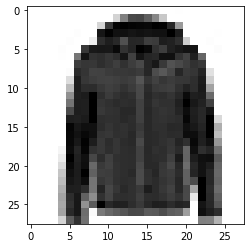

In [4]:
def show_single_image(img_arr):
    plt.imshow(img_arr, cmap="binary")
    plt.show()

show_single_image(x_train[0])

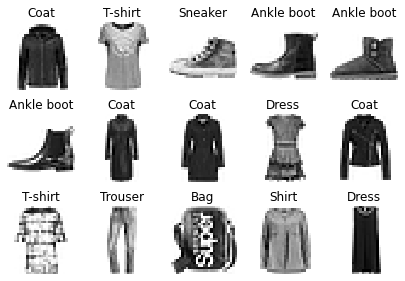

In [5]:
def show_imgs(n_rows, n_cols, x_data, y_data, class_names):
    assert len(x_data) == len(y_data)
    assert n_rows * n_cols < len(x_data)
    plt.figure(figsize = (n_cols * 1.4, n_rows * 1.6))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col 
            plt.subplot(n_rows, n_cols, index+1)
            plt.imshow(x_data[index], cmap="binary",
                       interpolation = 'nearest')
            plt.axis('off')
            plt.title(class_names[y_data[index]])
    plt.show()

class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress',
               'Coat', 'Sandal', 'Shirt', 'Sneaker',
               'Bag', 'Ankle boot']
show_imgs(3, 5, x_train, y_train, class_names)


In [6]:
# tf.keras.models.Sequential()

"""
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
"""

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
#     keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# relu: y = max(0, x)
# softmax: 将向量变成概率分布. x = [x1, x2, x3], 
#          y = [e^x1/sum, e^x2/sum, e^x3/sum], sum = e^x1 + e^x2 + e^x3

# reason for sparse: y->index. y->one_hot->[] 
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = "sgd",
              metrics = ["accuracy"])

In [7]:
model.layers

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [9]:
# [None, 784] * W + b -> [None, 300] W.shape [784, 300], b = [300]

In [10]:
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 3s 2ms/step - loss: 154.0846 - accuracy: 0.1073 - val_loss: 2.3028 - val_accuracy: 0.1002
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 2.2669 - accuracy: 0.1213 - val_loss: 2.1942 - val_accuracy: 0.1460
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 2.2136 - accuracy: 0.1457 - val_loss: 2.1911 - val_accuracy: 0.1358
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 2.2543 - accuracy: 0.1442 - val_loss: 2.2961 - val_accuracy: 0.0980
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 2.2674 - accuracy: 0.1180 - val_loss: 2.3064 - val_accuracy: 0.0914
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 2.2988 - accuracy: 0.1018 - val_loss: 2.3029 - val_accuracy: 0.0914
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 2.3028 - accuracy: 0.0981 - val_loss: 2.3024 - val_accurac

In [12]:
type(history)

tensorflow.python.keras.callbacks.History

In [13]:
history.history

{'loss': [4.599787224023992,
  0.7365305235429244,
  0.6529739934054288,
  0.5826076885786924,
  0.5450057860287753,
  0.5157407429044897,
  0.4949760743748058,
  0.4669956823869185,
  0.4407323715166612,
  0.4275606528585607],
 'accuracy': [0.6249273,
  0.7049818,
  0.7367091,
  0.7716182,
  0.7889636,
  0.80014545,
  0.80945456,
  0.82485455,
  0.8361818,
  0.8401818],
 'val_loss': [0.7757820220947266,
  0.6484994589209556,
  0.6377250983238221,
  0.5946815532684326,
  0.5697053789138794,
  0.5346372863769532,
  0.5146976159095764,
  0.5634896508932113,
  0.4952246562957764,
  0.4846856918811798],
 'val_accuracy': [0.7062,
  0.7338,
  0.745,
  0.774,
  0.7828,
  0.8024,
  0.8114,
  0.8094,
  0.8264,
  0.8342]}

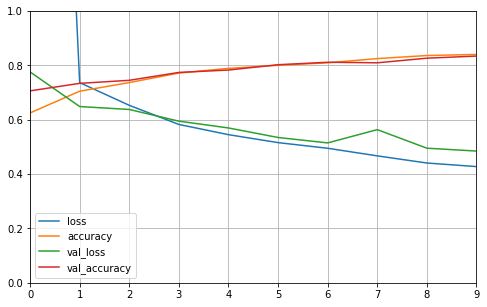

In [14]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

plot_learning_curves(history)

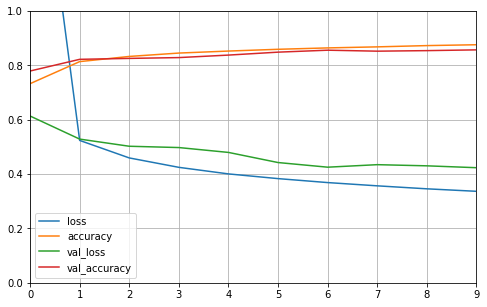

In [18]:
plot_learning_curves(history)

In [19]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 96us/sample - loss: 0.4376 - accuracy: 0.8532


[0.43761702871322633, 0.8532]